## Naive Bayes Classifier - Study Case Glass Clasification

### Import Library

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (3, 2) #Size of figure
rcParams['figure.dpi'] = 250
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

- Context
This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

- Content
    - Attribute Information:
    - Id number: 1 to 214 (removed from CSV file)
    - RI: refractive index
    - Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    - Mg: Magnesium
    - Al: Aluminum
    - Si: Silicon
    - K: Potassium
    - Ca: Calcium
    - Ba: Barium
    - Fe: Iron
    - Type of glass: (class attribute) -- 1 building_windows_float_processed -- 2 building_windows_non_float_processed -- 3 vehicle_windows_float_processed -- 4 vehicle_windows_non_float_processed (none in this database) -- 5 containers -- 6 tableware -- 7 headlamps

- Acknowledgements
https://archive.ics.uci.edu/ml/datasets/Glass+Identification 
- Source:
    - Creator: B. German Central Research Establishment Home Office Forensic Science Service Aldermaston, Reading, Berkshire RG7 4PN
    - Donor: Vina Spiehler, Ph.D., DABFT Diagnostic Products Corporation (213) 776-0180 (ext 3014)

In [52]:
df = pd.read_csv('glass.csv')

### Sneak Peak Data

In [53]:
#Top 5 our data
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [54]:
#Top 5 data from bottom
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [55]:
#Viewing the number of rows (214) and number of columns / features (10)
df.shape

(214, 10)

In [56]:
#General information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [57]:
#Look at Descriptive Statistic of Data.
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Handling Missing Values

In [58]:
#Data is clean and can continue to the Explorary Data Analysis stage
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### Exploratory Data Analysis

- Only several features that i analyze.

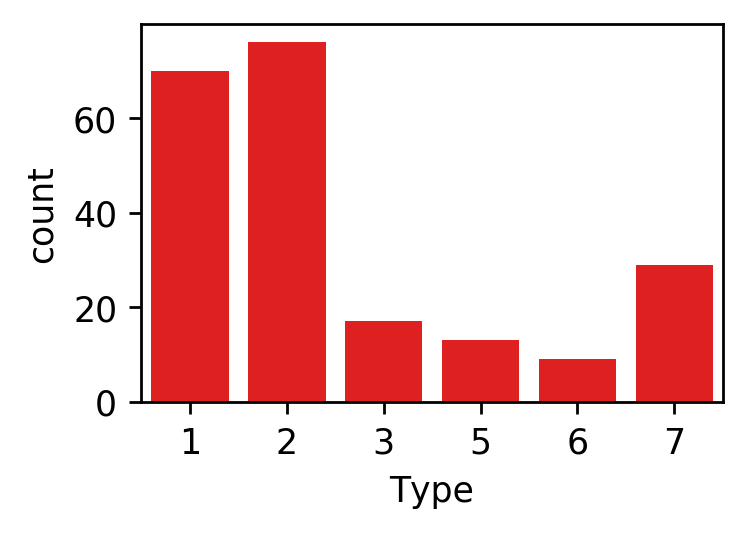

In [59]:
#Univariate analysis Type.
sns.countplot(df['Type'], color='red');

- It can be seen that the our data is imbalance because there type 1 and type 2 are very dominant compared to other types.

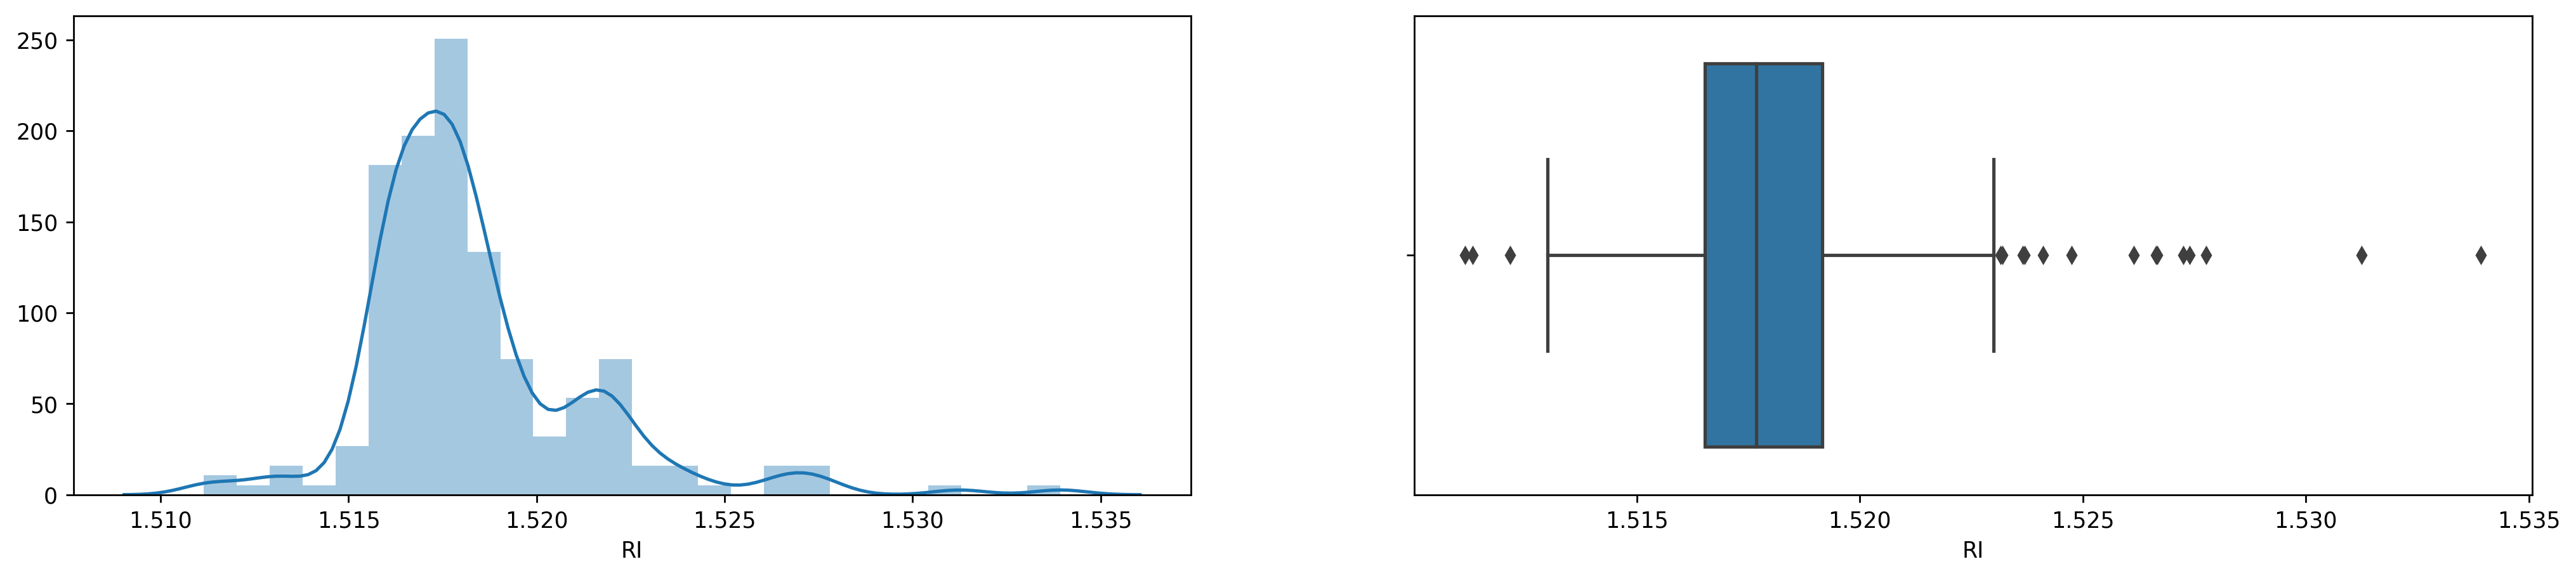

In [60]:
#Univariate analysis of RI (Refractive Index).

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['RI'])

f.add_subplot(1,2,2)
sns.boxplot(df['RI']);

- From the distplot can be seen that the density of the data lies in the range of numbers 1.515-1.520.
- From the boxplot shows that the data has many outliers.

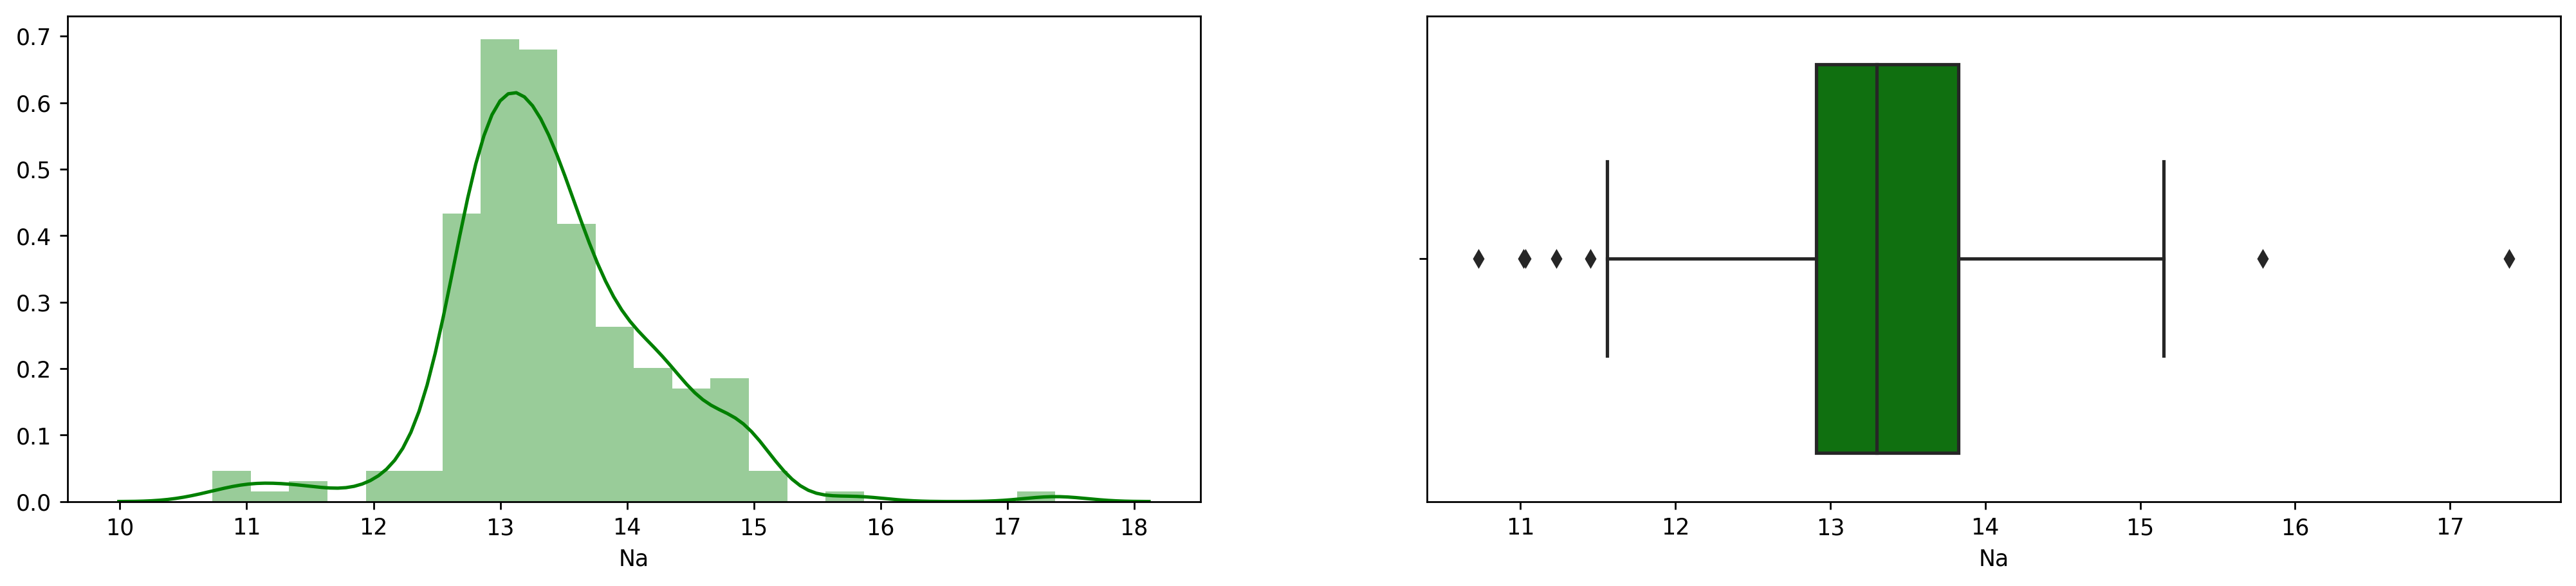

In [61]:
#Univariate analysis Na (Sodium).

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Na'], color='green')

f.add_subplot(1,2,2)
sns.boxplot(df['Na'], color='green');

- The most Na values are in the numbers from 13 until 14.
- Features Na has several outliers.

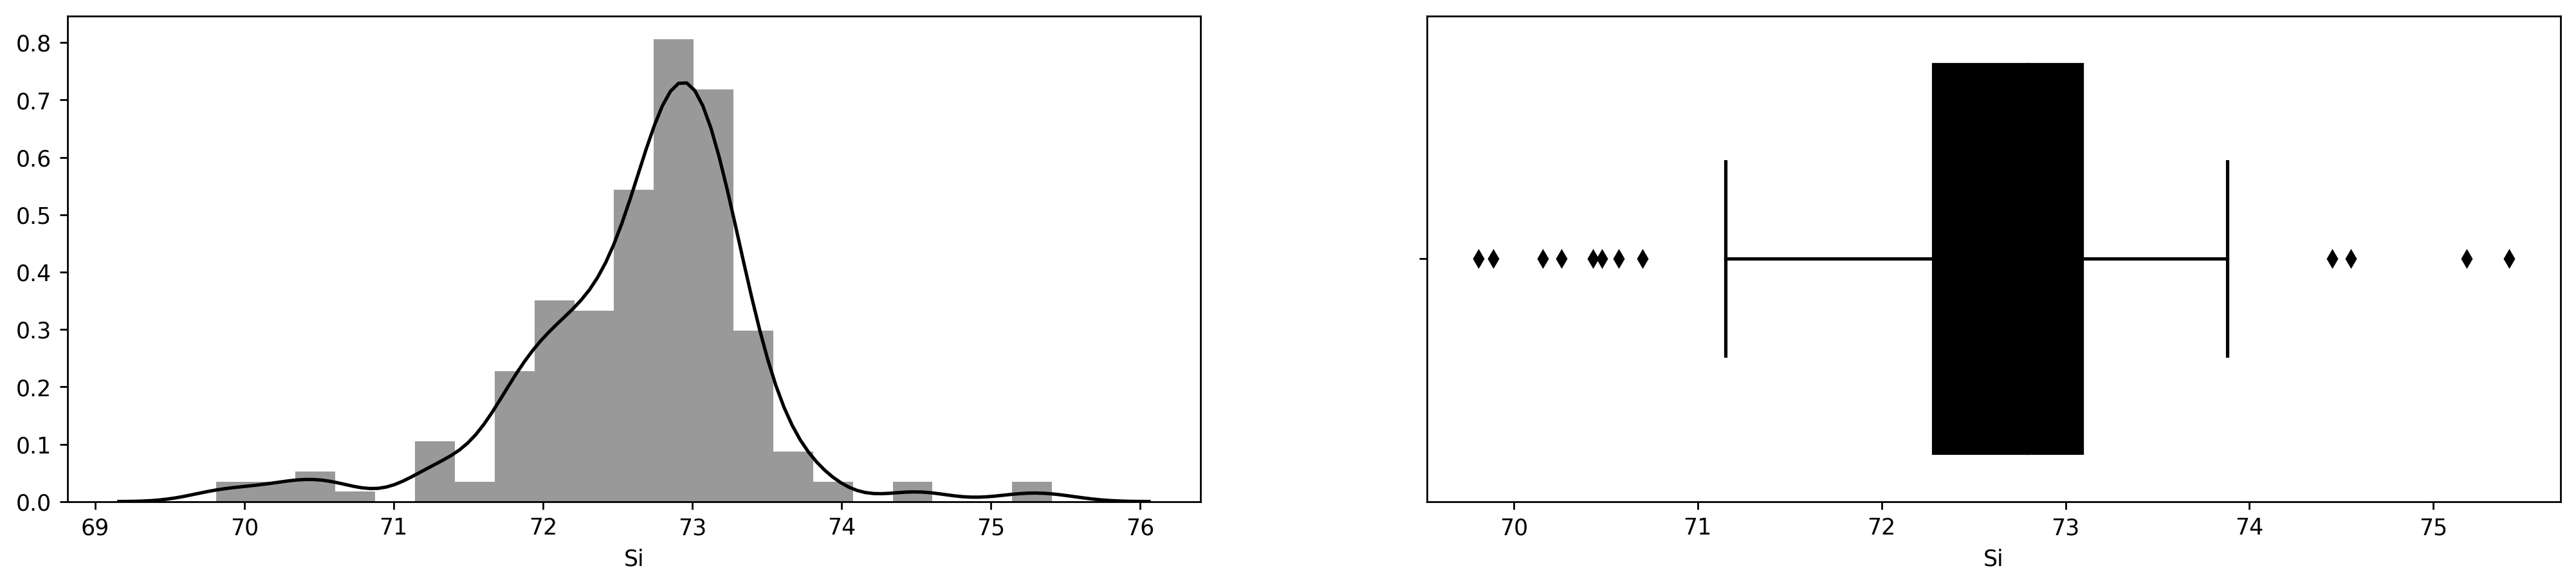

In [62]:
#Univariate analysis Si (silicon).

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Si'], color='black')

f.add_subplot(1,2,2)
sns.boxplot(df['Si'], color='black')

- Silicon features have density values in the range of 72 and 73.
- From the boxplot it can be seen that the silicon features have several outliers.

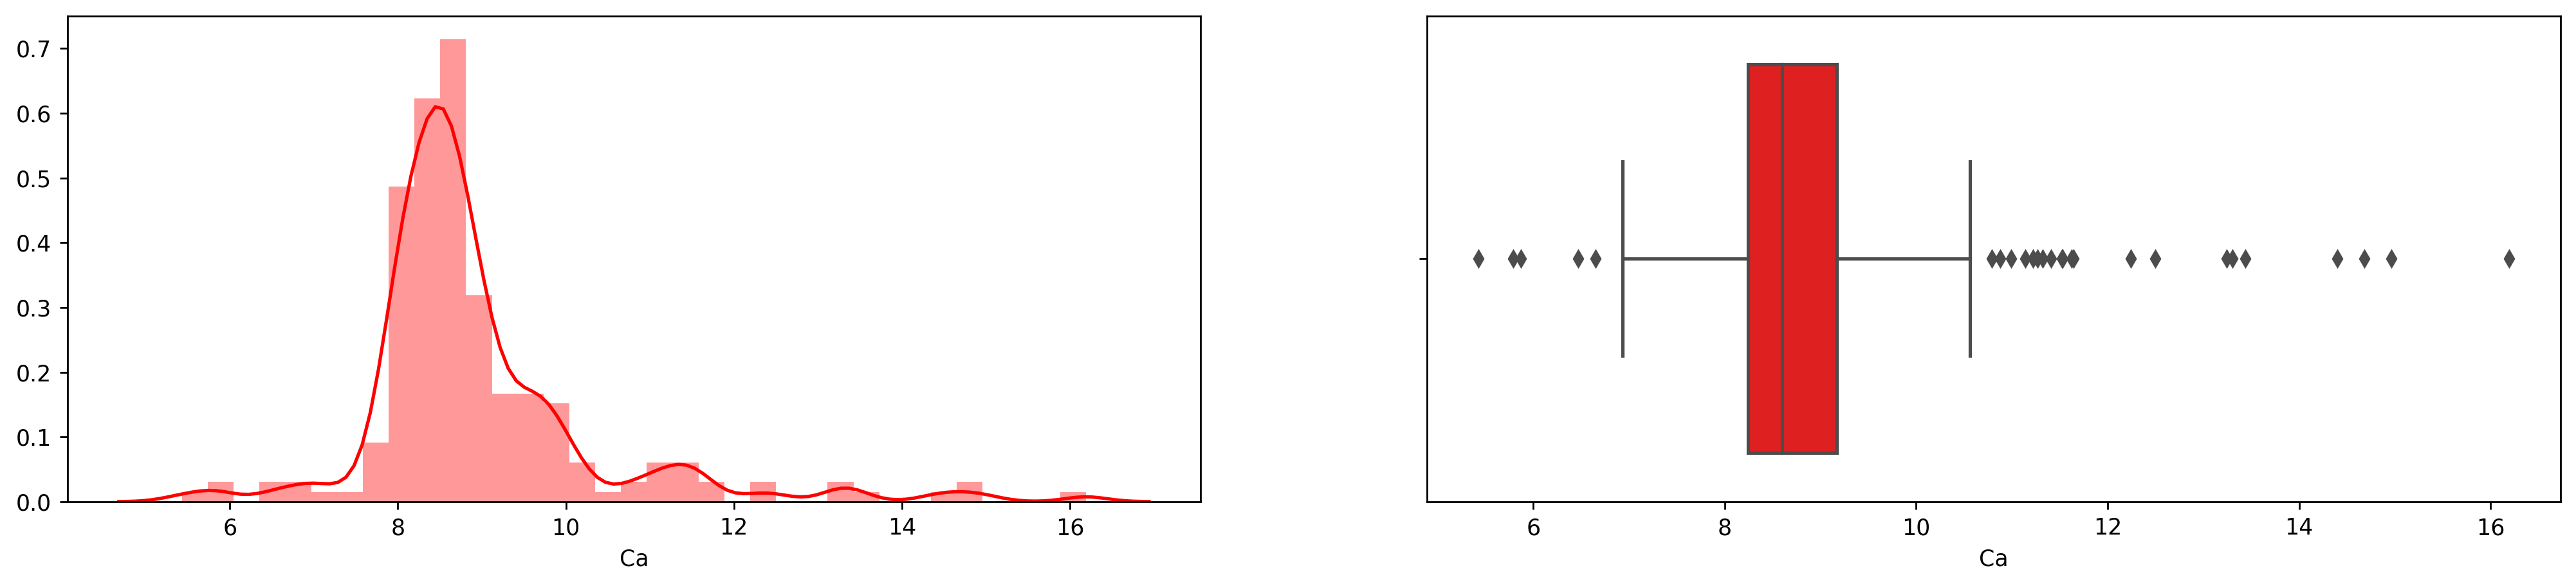

In [63]:
#Univariate analysis Ca (calcium).

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Ca'], color='red')

f.add_subplot(1,2,2)
sns.boxplot(df['Ca'], color='red')

- Distplot shows that the value of Calcium is most dense in the range of numbers 8-10.
- Boxpplot shows that there are many outliers whose values are below 6 and above 11.

In [64]:
#Correlation between features
df.corr().style.background_gradient().set_precision(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1,-0.19,-0.12,-0.41,-0.54,-0.29,0.81,-0.00039,0.14,-0.16
Na,-0.19,1,-0.27,0.16,-0.07,-0.27,-0.28,0.33,-0.24,0.5
Mg,-0.12,-0.27,1,-0.48,-0.17,0.0054,-0.44,-0.49,0.083,-0.74
Al,-0.41,0.16,-0.48,1,-0.0055,0.33,-0.26,0.48,-0.074,0.6
Si,-0.54,-0.07,-0.17,-0.0055,1,-0.19,-0.21,-0.1,-0.094,0.15
K,-0.29,-0.27,0.0054,0.33,-0.19,1,-0.32,-0.043,-0.0077,-0.01
Ca,0.81,-0.28,-0.44,-0.26,-0.21,-0.32,1,-0.11,0.12,0.00095
Ba,-0.00039,0.33,-0.49,0.48,-0.1,-0.043,-0.11,1,-0.059,0.58
Fe,0.14,-0.24,0.083,-0.074,-0.094,-0.0077,0.12,-0.059,1,-0.19
Type,-0.16,0.5,-0.74,0.6,0.15,-0.01,0.00095,0.58,-0.19,1


- There is a fairly strong positive linear relationship between glass types with Na, Al, and Ba.
- As for negative linear relationships, the target has a strong relationship with Mg.

### Modelling

In [65]:
# Create a Naive Bayes object
nb = GaussianNB()

In [66]:
#Create variable x and y.
x = df.drop(columns=['Type'])
y = df['Type']

In [67]:
#Split data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [68]:
#Training the model
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [69]:
#Predict testing set
y_pred = nb.predict(x_test)

In [70]:
#Check performance of model
print(accuracy_score(y_test, y_pred))

0.4883720930232558


- From the accuracy score it can be seen that the value is 48% which in my opinion still needs to be improved again.
- From my analysis, why the accuracy value of the Naive Bayes model is so low is due to imbalanced data. So one of the ways that I will use to improve the accuracy of my model is the data balancing that I will do in the next article. So Stay Tune!